# Task: ICPC Dhaka Regional 2024 Data Analysis

The International Collegiate Programming Contest (ICPC) is the oldest, largest, and most prestigious programming competition in the world, often hailed as the "World Cup of Programming." It is a team-based competition where university students work in teams of three to solve a set of complex algorithmic problems within a five-hour time limit. The contest fosters creativity, teamwork, and innovation in building new software programs and enables students to test their ability to perform under pressure.

## Contest Rules

In programming contests like the ICPC, the ranking of teams is determined by two main factors. The primary factor is the **total number of problems solved**; the team that solves the most problems ranks higher. If two or more teams solve the same number of problems, a tie is broken by the **total penalty time**. The team with the lower total penalty time is ranked higher. The penalty for a single solved problem is calculated as the time taken to solve it (in minutes from the start of the contest) plus a 20-minute penalty for each incorrect submission for that problem. For example, if a team solves a problem on their 3rd attempt at the 200-minute mark, the penalty for that problem will be 200 + (2 × 20) = 240. Importantly, *teams do not incur any penalty for problems they did not solve, regardless of how many incorrect attempts they made.*

## The Dataset

You are provided with a CSV file named *icpc_dhaka_2024.csv* containing the performance data of all the teams. The sheet has the following columns:

- **name**: The unique name of the team.
- **institution**: The university the team belongs to.
- **attemptsForX**: A column for each problem (e.g., attemptsForA, attemptsForB) that shows the total number of attempts a team made on that problem.
- **timeForX**: A column for each problem (e.g., timeForA, timeForB) that shows the time in minutes at which the team got their first correct submission. If this cell is empty, it means the team did not solve that problem.

## Your Tasks

Your goal is to analyze this dataset to find interesting patterns and insights. You are required to complete the following tasks:

1. **Rank the Top Teams**
Calculate each team's total problems solved and their total penalty time based on the rules described above. Then, generate a final ranked list showing the top 10 teams along with their rank, name, institution, problems solved, and total penalty.

2. **Identify the Fastest Solvers**
For each problem that was solved by at least one team, find the name of the team that submitted the first correct solution (i.e., had the minimum solve time). Present your findings as a list, showing each problem, the fastest team's name, and their solve time.

3. **Open-Ended Data Visualization & Exploratory Analysis**
This is your chance to explore the data creatively! Use some of your known visualization tools to analyze the data and present your findings. You have the freedom to investigate any aspect of the data you find interesting.
For this task, remember to *follow good data visualization principles* and *write a clear explanation* of your findings for each visualization you create. Some ideas to get you started can be:

  - **Problem Difficulty**: Analyze the solve times and solve counts for each problem to determine which problems were the easiest and which were the hardest.

  - **Top Team Dashboard**: Create a dashboard-style visualization that summarizes the performance of the top 5 or 10 teams. This could include their solved counts, penalty breakdown, and which problems they solved.

  - **Institutional Performance**: Analyze and compare the performance of the top institutions in the contest like BUET, SUST, DU, BRACU, IUT, RUET, KUET, CoU.

# Your Solution

In [1]:
# START YOUR CODE HERE

### **Task-1**

In [2]:
import pandas as pd

df = pd.read_csv('icpc_dhaka_2024.csv')
display(df.head())

,name,institution,attemptsForA,timeForA,attemptsForB,timeForB,attemptsForC,timeForC,attemptsForD,timeForD,...,attemptsForH,timeForH,attemptsForI,timeForI,attemptsForJ,timeForJ,attemptsForK,timeForK,attemptsForL,timeForL
0,00_Cyborgs_KYAU,KHWAJA YUNUS ALI UNIVERSITY,0,NaN,0,NaN,0,NaN,0,NaN,...,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN
1,0xC00000FD,BANGLADESH OPEN UNIVERSITY,0,NaN,0,NaN,0,NaN,0,NaN,...,0,NaN,2,112.0,2,NaN,0,NaN,0,NaN
2,998244353,RAJSHAHI UNIVERSITY OF ENGINEERING & TECHNOLOGY,0,NaN,4,293.0,2,146.0,3,276.0,...,0,NaN,1,7.0,1,103.0,0,NaN,0,NaN
3,ADUST_ByteBusters,ATISH DIPANKAR UNIVERSITY OF SCIENCE AND TECHN...,0,NaN,0,NaN,0,NaN,0,NaN,...,0,NaN,1,NaN,0,NaN,0,NaN,0,NaN
4,AIUB_Conquered,AMERICAN INTERNATIONAL UNIVERSITY - BANGLADESH,0,NaN,0,NaN,0,NaN,6,NaN,...,0,NaN,1,20.0,0,NaN,0,NaN,0,NaN


In [3]:
problem_columns = sorted(list(set([col[11:] for col in df.columns if col.startswith('attemptsFor')])))
problem_columns

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L']

In [ ]:
def calculate_team_stats(row):
    solved_problems = 0
    total_penalty = 0
    
    problem_columns = sorted(list(set([col[11:] for col in df.columns if col.startswith('attemptsFor')])))

    for problem in problem_columns:
        attempts_col = f'attemptsFor{problem}'
        time_col = f'timeFor{problem}'

        if pd.notna(row[time_col]):
            solved_problems += 1
            attempts = row[attempts_col]
            solve_time = row[time_col]
            penalty = solve_time + (attempts - 1) * 20
            total_penalty += penalty
    return solved_problems, total_penalty

df[['problems_solved', 'total_penalty']] = df.apply(calculate_team_stats, axis=1, result_type='expand')

display(df[['name', 'institution', 'problems_solved', 'total_penalty']].head())

,name,institution,problems_solved,total_penalty
0,00_Cyborgs_KYAU,KHWAJA YUNUS ALI UNIVERSITY,0.0,0.0
1,0xC00000FD,BANGLADESH OPEN UNIVERSITY,2.0,394.0
2,998244353,RAJSHAHI UNIVERSITY OF ENGINEERING & TECHNOLOGY,6.0,1011.0
3,ADUST_ByteBusters,ATISH DIPANKAR UNIVERSITY OF SCIENCE AND TECHN...,0.0,0.0
4,AIUB_Conquered,AMERICAN INTERNATIONAL UNIVERSITY - BANGLADESH,2.0,91.0


In [5]:
ranked_teams = df.sort_values(by=['problems_solved', 'total_penalty'], ascending=[False, True])
ranked_teams['rank'] = range(1, len(ranked_teams) + 1)

display(ranked_teams[['rank', 'name', 'institution', 'problems_solved', 'total_penalty']].head(10))

,rank,name,institution,problems_solved,total_penalty
263,1,SUST_Fanatics,SHAHJALAL UNIVERSITY OF SCIENCE AND TECHNOLOGY,7.0,948.0
115,2,DU_Singularity,UNIVERSITY OF DHAKA,7.0,1198.0
112,3,DU_Primordius,UNIVERSITY OF DHAKA,6.0,674.0
81,4,CoU_LastRunForMemories,COMILLA UNIVERSITY,6.0,677.0
164,5,IUT_CocolaChampionBiscuit,ISLAMIC UNIVERSITY OF TECHNOLOGY,6.0,824.0
29,6,BRACU_Crows,BRAC UNIVERSITY,6.0,841.0
132,7,FaimDeSang,SHAHJALAL UNIVERSITY OF SCIENCE AND TECHNOLOGY,6.0,858.0
2,8,998244353,RAJSHAHI UNIVERSITY OF ENGINEERING & TECHNOLOGY,6.0,1011.0
49,9,BUET_Quasar,BANGLADESH UNIVERSITY OF ENGINEERING AND TECHN...,5.0,507.0
151,10,IOI1,INTERNATIONAL OLYMPIAD IN INFORMATICS,5.0,582.0


### **Task-2**

In [14]:
fastest_solvers = {}
problem_columns = sorted(list(set([col[11:] for col in df.columns if col.startswith('attemptsFor')])))

for problem in problem_columns:
    time_col = f'timeFor{problem}'
    solved_teams = df[df[time_col].notna()]
    if not solved_teams.empty:
        fastest_team = solved_teams.loc[solved_teams[time_col].idxmin()]
        fastest_solvers[problem] = {
            'team_name': fastest_team['name'],
            'solve_time': fastest_team[time_col]
        }

for problem, data in fastest_solvers.items():
    print(f"Problem {problem}: Fastest team is {data['team_name']} with solve time {data['solve_time']} minutes")

Problem B: Fastest team is MBSTU_Novatos with solve time 139.0 minutes
Problem C: Fastest team is IUT_CocolaChampionBiscuit with solve time 112.0 minutes
Problem D: Fastest team is FaimDeSang with solve time 46.0 minutes
Problem E: Fastest team is DU_Primordius with solve time 189.0 minutes
Problem G: Fastest team is BRACU_Crows with solve time 3.0 minutes
Problem I: Fastest team is 998244353 with solve time 7.0 minutes
Problem J: Fastest team is DU_Singularity with solve time 34.0 minutes


### **Task-3**

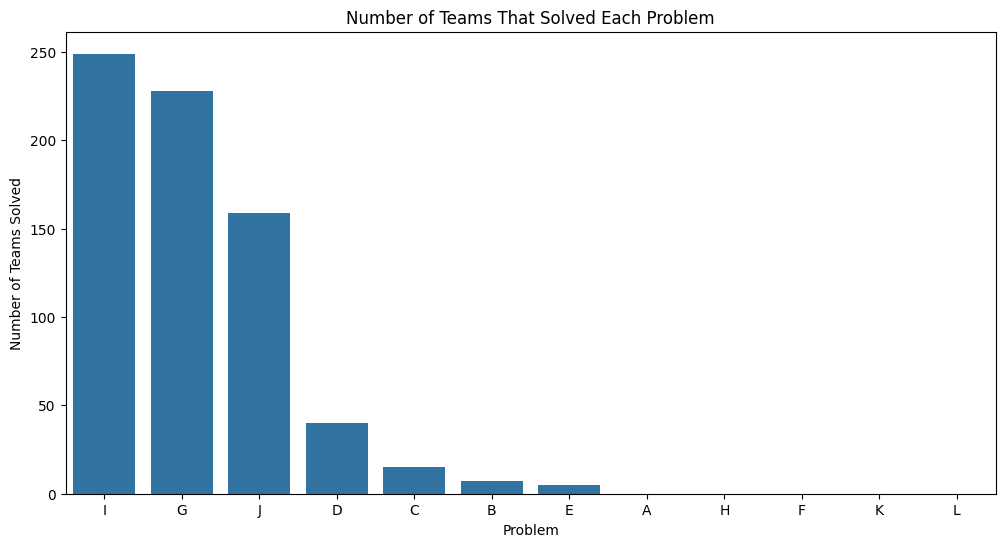

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of teams who solved each problem
solved_counts = {}
problem_columns = sorted(list(set([col[11:] for col in df.columns if col.startswith('attemptsFor')])))

for problem in problem_columns:
    time_col = f'timeFor{problem}'
    solved_counts[problem] = df[df[time_col].notna()].shape[0]

solved_counts_df = pd.DataFrame.from_dict(solved_counts, orient='index', columns=['teams_solved']).reset_index()
solved_counts_df = solved_counts_df.rename(columns={'index': 'problem'})
solved_counts_df = solved_counts_df.sort_values(by='teams_solved', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='problem', y='teams_solved', data=solved_counts_df)
plt.title('Number of Teams That Solved Each Problem')
plt.xlabel('Problem')
plt.ylabel('Number of Teams Solved')
plt.show()

,institution,average_problems_solved,average_total_penalty
0,BANGLADESH UNIVERSITY OF ENGINEERING AND TECHN...,3.600000,407.900000
1,BRAC UNIVERSITY,3.800000,518.400000
2,COMILLA UNIVERSITY,3.400000,428.600000
3,ISLAMIC UNIVERSITY OF TECHNOLOGY,3.500000,352.166667
4,KHULNA UNIVERSITY OF ENGINEERING & TECHNOLOGY,3.250000,502.250000
5,RAJSHAHI UNIVERSITY OF ENGINEERING & TECHNOLOGY,3.444444,463.333333
6,SHAHJALAL UNIVERSITY OF SCIENCE AND TECHNOLOGY,4.300000,610.200000
7,UNIVERSITY OF DHAKA,3.888889,502.666667


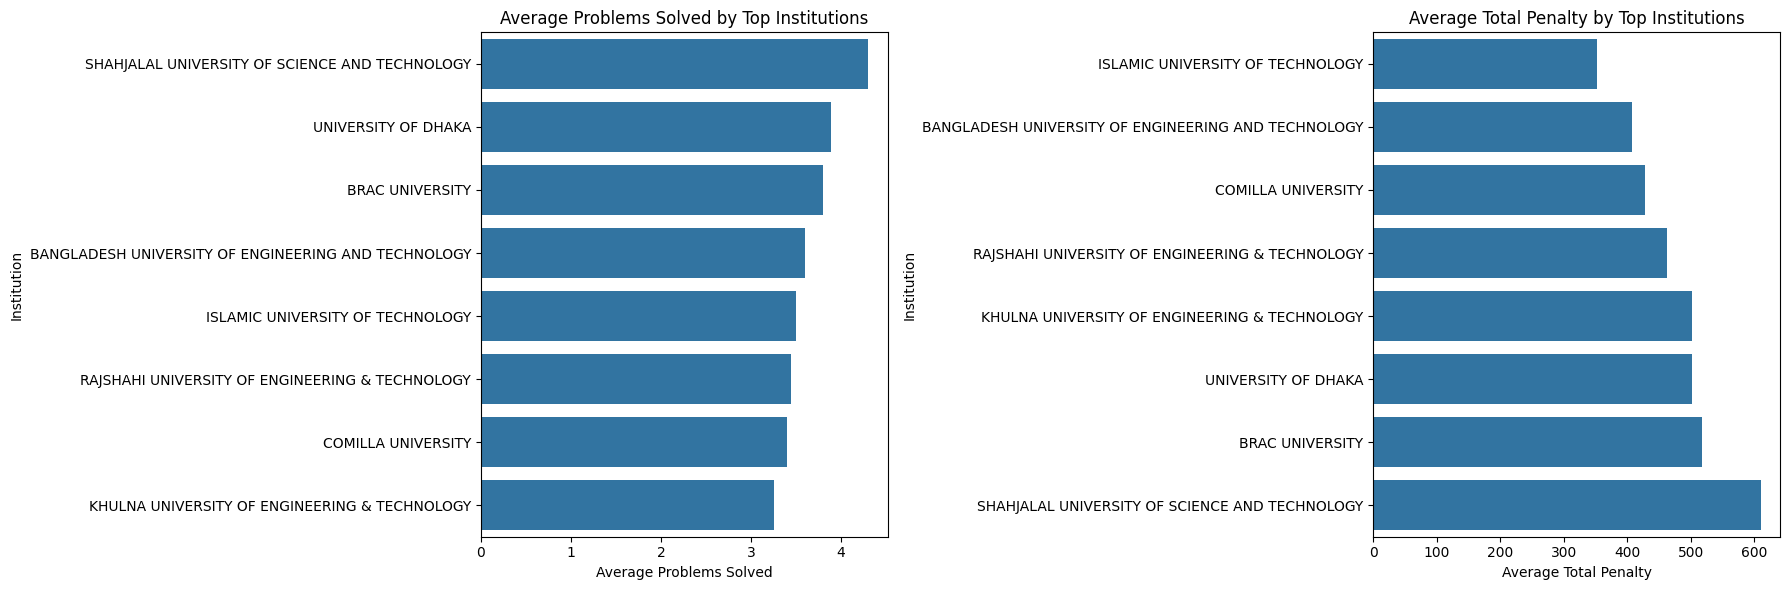

In [25]:
# Analyze institutional performance for top institutions
top_institutions = ['BANGLADESH UNIVERSITY OF ENGINEERING AND TECHNOLOGY', 'SHAHJALAL UNIVERSITY OF SCIENCE AND TECHNOLOGY', 'UNIVERSITY OF DHAKA', 'BRAC UNIVERSITY', 'ISLAMIC UNIVERSITY OF TECHNOLOGY', 'RAJSHAHI UNIVERSITY OF ENGINEERING & TECHNOLOGY', 'KHULNA UNIVERSITY OF ENGINEERING & TECHNOLOGY', 'COMILLA UNIVERSITY']

# Filter the ranked teams to include only the top institutions
top_institutions_df = ranked_teams[ranked_teams['institution'].isin(top_institutions)]

# Group by institution and calculate average problems solved and total penalty
institutional_performance = top_institutions_df.groupby('institution').agg(
    average_problems_solved=('problems_solved', 'mean'),
    average_total_penalty=('total_penalty', 'mean')
).reset_index()

display(institutional_performance)

# Visualize institutional performance
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.barplot(x='average_problems_solved', y='institution', data=institutional_performance.sort_values(by='average_problems_solved', ascending=False), ax=axes[0])
axes[0].set_title('Average Problems Solved by Top Institutions')
axes[0].set_xlabel('Average Problems Solved')
axes[0].set_ylabel('Institution')

sns.barplot(x='average_total_penalty', y='institution', data=institutional_performance.sort_values(by='average_total_penalty'), ax=axes[1])
axes[1].set_title('Average Total Penalty by Top Institutions')
axes[1].set_xlabel('Average Total Penalty')
axes[1].set_ylabel('Institution')

plt.tight_layout()
plt.show()

In [26]:
unique_institutions = df['institution'].unique()
print(unique_institutions)

['KHWAJA YUNUS ALI UNIVERSITY' 'BANGLADESH OPEN UNIVERSITY'
 'RAJSHAHI UNIVERSITY OF ENGINEERING & TECHNOLOGY'
 'ATISH DIPANKAR UNIVERSITY OF SCIENCE AND TECHNOLOGY'
 'AMERICAN INTERNATIONAL UNIVERSITY - BANGLADESH'
 'ASIAN UNIVERSITY OF BANGLADESH'
 'AHSANULLAH UNIVERSITY OF SCIENCE AND TECHNOLOGY'
 'NOAKHALI SCIENCE AND TECHNOLOGY UNIVERSITY'
 'JATIYA KABI KAZI NAZRUL ISLAM UNIVERSITY'
 'RANGAMATI SCIENCE AND TECHNOLOGY UNIVERSITY'
 'JAGANNATH UNIVERSITY, BANGLADESH'
 'BANGLADESH ARMY INTERNATIONAL UNIVERSITY OF SCIENCE AND TECHNOLOGY'
 'BANGLADESH ARMY UNIVERSITY OF ENGINEERING AND TECHNOLOGY'
 'BANGLADESH ARMY UNIVERSITY OF SCIENCE AND TECHNOLOGY'
 'BANGLADESH AGRICULTURAL UNIVERSITY' 'BRAHMANBARIA POLYTECHNIC INSTITUTE'
 'BGC TRUST UNIVERSITY BANGLADESH' 'BRAC UNIVERSITY'
 'BEGUM ROKEYA UNIVERSITY, RANGPUR'
 'BANGAMATA SHEIKH FOJILATUNNESA MUJIB SCIENCE AND TECHNOLOGY UNIVERSITY'
 'BANGABANDHU SHEIKH MUJIBUR RAHMAN SCIENCE AND TECHNOLOGY UNIVERSITY'
 'BANGABANDHU SHEIKH MUJIBUR RA

## Analysis Summary

Based on the analysis of the ICPC Dhaka Regional 2024 dataset:

### Top Teams
The top 10 teams were ranked based on the number of problems solved and total penalty time. The top team, SUST_Fanatics, solved 7 problems with a total penalty of 948 minutes.

### Fastest Solvers
The fastest solvers for each problem were identified. For example, the fastest team to solve Problem G was BRACU_Crows with a solve time of 3 minutes.

### Problem Difficulty
By visualizing the number of teams that solved each problem, it is evident that problems I, G, and J were solved by the most teams, suggesting they were among the easier problems. Conversely, problems A, F, H, K, and L were not solved by any teams, indicating they were the most difficult.

### Institutional Performance
An analysis of the top institutions revealed that SHAHJALAL UNIVERSITY OF SCIENCE AND TECHNOLOGY had the highest average number of problems solved among the listed institutions, while ISLAMIC UNIVERSITY OF TECHNOLOGY had the lowest average total penalty.